# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [3]:
# Mounting google drive
# from google.colab import drive
# drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

In [4]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/cv-learnings/files/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size


100%|██████████| 4/4 [00:00<00:00, 1435.30it/s]


In [9]:
len(gt_images)

4

In [5]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

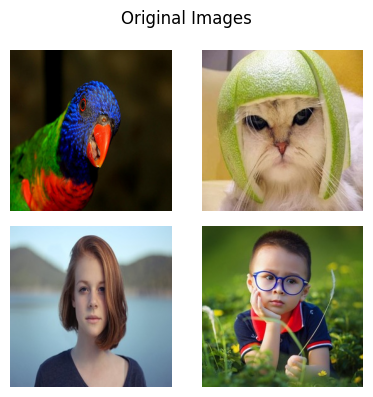

In [6]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [16]:
def add_impulse_noise(image, noise_prob):
    # Write Your Code Here
    noisy_image = image.copy()
    rows,cols,channels = noisy_image.shape
    total_pixels=rows*cols
    num_noisy_pixels=int(noise_prob*total_pixels)
    #add salt noise
    for i in range(num_noisy_pixels//2):
        x=np.random.randint(0,rows-1)
        y=np.random.randint(0,cols-1)
        noisy_image[x,y]=[255,255,255]
    #add pepper noise
    for i in range(num_noisy_pixels//2):
        x=np.random.randint(0,rows-1)
        y=np.random.randint(0,cols-1)
        noisy_image[x,y]=[0,0,0]
    return noisy_image

##### Constant noise parameters

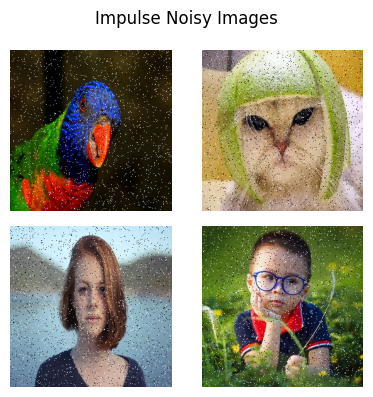

In [18]:
impulse_noisy_images  = []
for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
impulse_noisy_images = np.array(impulse_noisy_images)
show_image_grid(impulse_noisy_images, 2, 2, 'Impulse Noisy Images')

####  variation in noise parameter

0.02
0.05
0.08
0.1


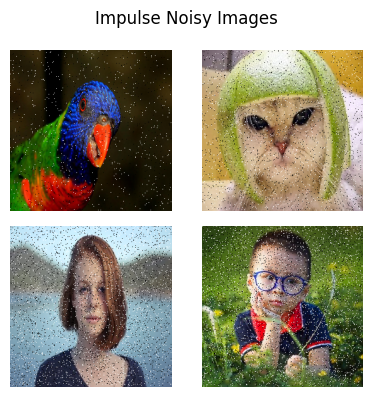

In [20]:
# Write code here
impulse_noisy_images  = []
# Write code here for variation in noise parameter
noise_probs=[0.02,0.05,0.08,0.1]

for i, image in enumerate(gt_images):
    noise_prob=noise_probs[i%len(noise_probs)]
    print(noise_prob)
    noise_image = add_impulse_noise(image, noise_prob)
    impulse_noisy_images.append(noise_image)

impulse_noisy_images = np.array(impulse_noisy_images)
show_image_grid(impulse_noisy_images, 2, 2, 'Impulse Noisy Images')    

In [7]:

# def add_gaussian_noise(image, mean, std):
#     # Write Your Code Here
#     return noisy_image

0.02
0.05
0.08
0.5


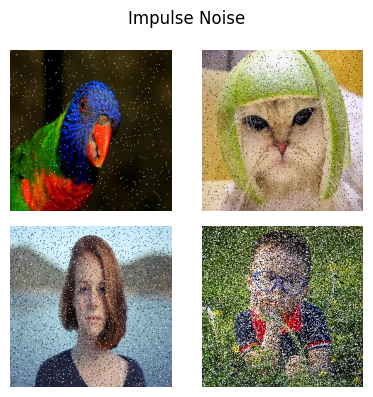

In [15]:

gaussian_noisy_images = []





# for image in gt_images:
#     impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
#     # gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
# # gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise')
# # show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise')

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
def apply_box_filter(image, kernel_size):
    # Write Your Code Here
    return blurred_image

def apply_gaussain_filter(image, kernel_size, sigma):
    # Write Your Code Here
    return blurred_image

def apply_median_filter(image, kernel_size):
    # Write Your Code Here
    return filtered_image

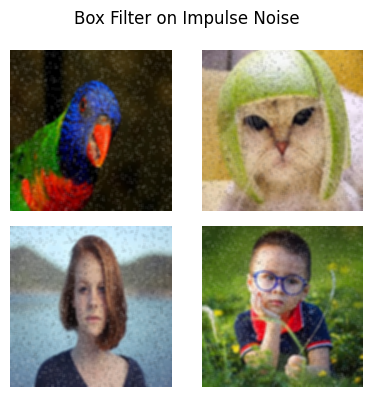

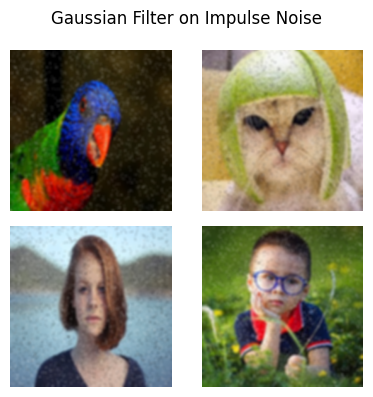

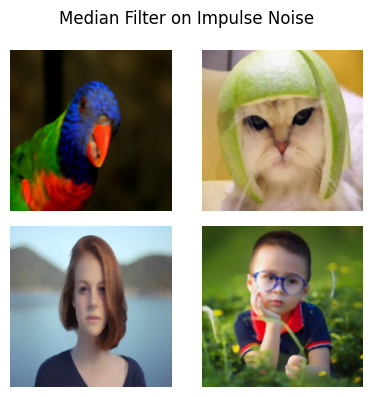

In [ ]:
# Write code here
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

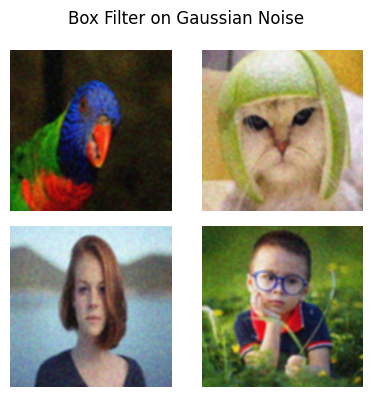

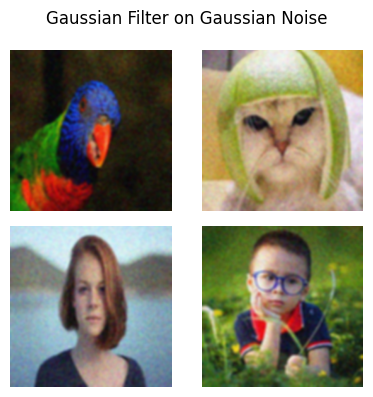

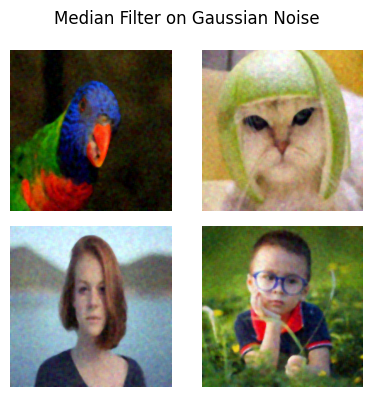

In [ ]:
# Write code here
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

def apply_canny_edge_detector_self(image, threshold1, threshold2):
    # Write your code here




    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
threshold1 = 80
threshold2 = 180

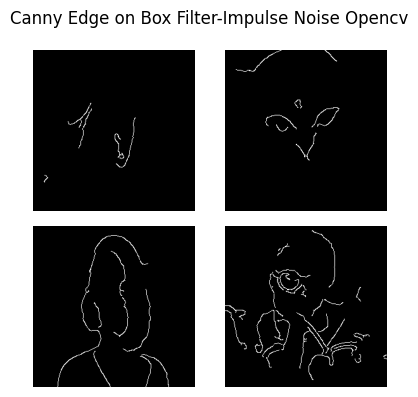

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_box_filter_images_impulse = np.array(canny_edge_box_filter_images_impulse)
# canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
# show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

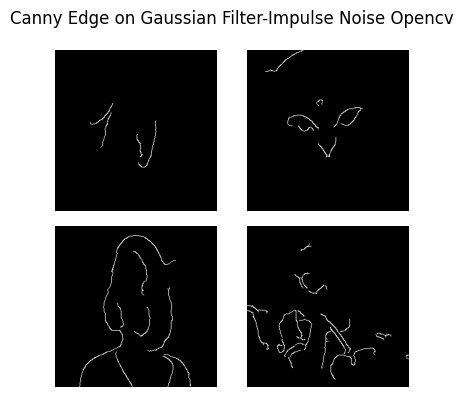

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_impulse = np.array(canny_edge_gaussian_filter_images_impulse)
# canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
# show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

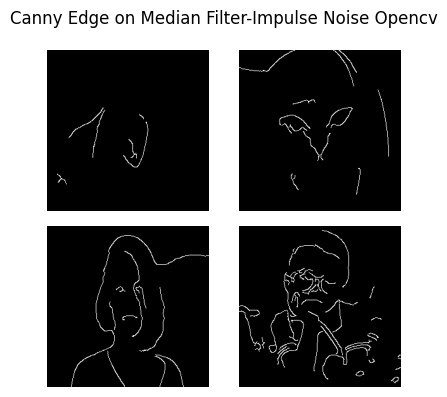

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_impulse = np.array(canny_edge_median_filter_images_impulse)
# canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
# show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

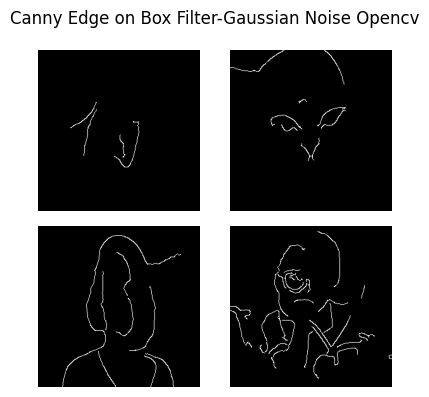

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_box_filter_images_gaussian = np.array(canny_edge_box_filter_images_gaussian)
# canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
# show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

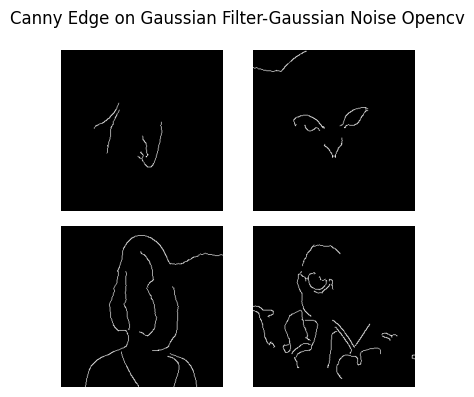

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_gaussian = np.array(canny_edge_gaussian_filter_images_gaussian)
# canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
# show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

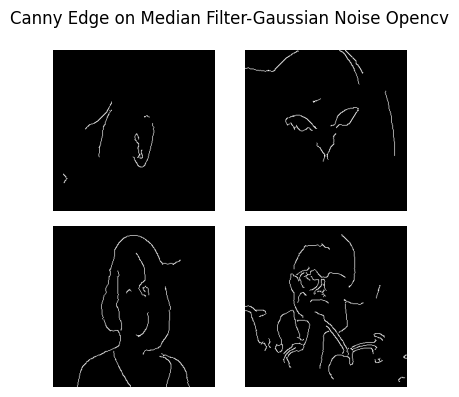

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    # canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_gaussian = np.array(canny_edge_median_filter_images_gaussian)
# canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
# show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

In [ ]:
####
# RMSE table of size 6 x 4
###